In [1]:
import zeus21
from matplotlib import pyplot as plt
from matplotlib import colors as cc 
import numpy as np
import matplotlib as mpl
from matplotlib.cm import get_cmap

#set up the CLASS cosmology
from classy import Class
ClassCosmo = Class()
ClassCosmo.compute()

In [2]:
plt.rcParams.update({"text.usetex": True, "font.family": "Times new roman"}) # Use latex fonts
plt.rcParams['lines.linewidth'] = 2
colors = ['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6', '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226']
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors) # Set the color palette as default

In [3]:
CosmoParams_input = zeus21.Cosmo_Parameters_Input()

In [4]:
CosmoParams_use,ClassyCosmo_use, CorrFclass_21_use ,HMFintclass_use =  zeus21.cosmo_wrapper(CosmoParams_input)

In [5]:
# define all the input params
AstroParams_use = zeus21.Astro_Parameters(CosmoParams_use)

In [6]:
ZMIN = 5.0 #down to which z we compute the evolution

run_sfrd_module = zeus21.get_T21_coefficients(CosmoParams_use, ClassyCosmo_use, AstroParams_use, HMFintclass_use, zmin=ZMIN)


In [7]:
RSDMODE = 0 #which RSD mode you want, 0 is no RSDs (real space), 1 is spherical (as simulations usually take), 2 is mu~1 (outside the wedge, most relevant for observations)
PS21_use = zeus21.Power_Spectra(CosmoParams_use, AstroParams_use, ClassyCosmo_use, CorrFclass_21_use, run_sfrd_module, RSD_MODE = RSDMODE)

BMF = zeus21.BMF(run_sfrd_module,HMFintclass_use,CosmoParams_use,AstroParams_use)

Lbox = 100
Nbox = 100 

 50%|█████     | 5/10 [00:00<00:00,  8.42it/s]

SUCCESS: BMF converged in 5 iterations.


100%|██████████| 1/1 [00:00<00:00, 17.50it/s]


Done!

Total time:

0min 3s




100%|██████████| 1/1 [00:00<00:00, 22.91it/s]


Done!

Total time:

0min 3s




100%|██████████| 1/1 [00:00<00:00, 21.62it/s]


Done!

Total time:

0min 3s




100%|██████████| 1/1 [00:00<00:00, 24.87it/s]


Done!

Total time:

0min 3s




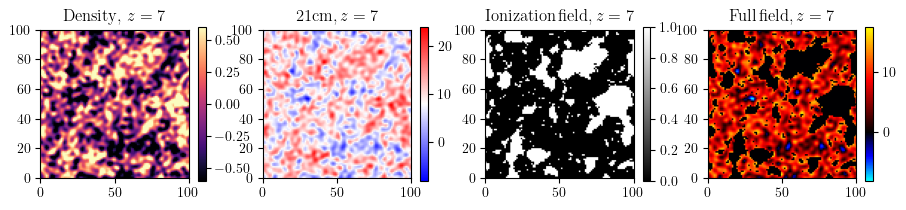

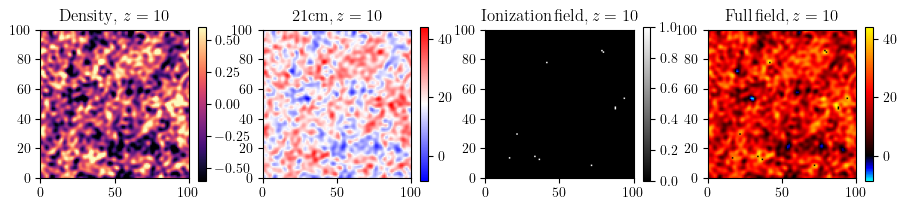

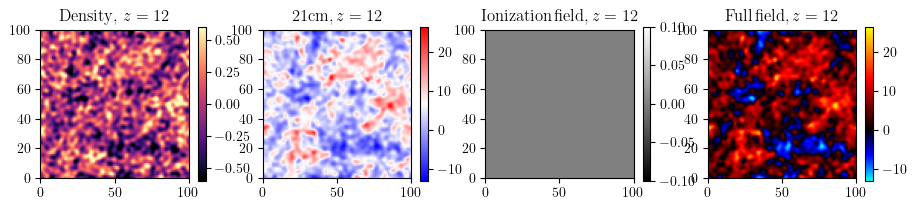

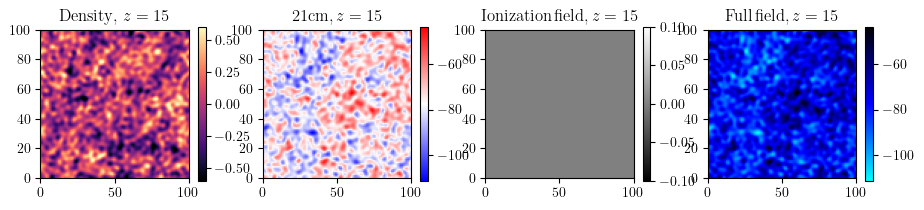

In [8]:
zvals = [7.,10.,12.,15.]

for z in zvals:

    _islice = 0

    Map21 = zeus21.CoevalMaps(run_sfrd_module, PS21_use, z, KIND=1,Lbox=Lbox,Nbox=Nbox)
    coeval_slice_T21 = Map21.T21map[_islice]
    coeval_slice_ion = zeus21.maps.make_ion_fields(CosmoParams_use, run_sfrd_module, ClassyCosmo_use, CorrFclass_21_use, BMF, z, boxlength=Lbox, ncells=Nbox, seed=1605, r_precision=1., timer=False, logd = False, barrier = None, spherize=False, FLAG_return_densities = 0)[0][0][_islice]

    coeval_slice = (1.-coeval_slice_ion) * coeval_slice_T21

    # There are zero values! We'll have blue for negative temperatures and red for positive ones
    min_value = np.min(coeval_slice)
    max_value = np.max(coeval_slice)

    # There are zero values! We'll have blue for negative temperatures and red for positive ones
    if min_value < 0 and max_value > 0:
        mid_point = abs(min_value)/(abs(min_value)+abs(max_value))
        colors_list = [(0, "cyan"),
                        (mid_point/2., "blue"),
                        (mid_point, "black"),
                        ((1.+mid_point)/2., "red"),
                        (1, "yellow")]
    # All values are negative! We'll have only blue colors
    elif max_value < 0:
        colors_list = [(0, "cyan"),
                        (0.5, "blue"),
                        (1, "black")]
    # All values are positive! We'll have only red colors
    else:
        colors_list = [(0, "black"),
                        (0.5, "red"),
                        (1., "yellow")]
    eor_colour = cc.LinearSegmentedColormap.from_list("eor_colour",colors_list)


    plt.figure(figsize=(11,2))
    plt.subplot(141)
    plt.imshow(Map21.deltamap[_islice],extent=(0,Lbox,0,Lbox),cmap='magma',vmin=-0.6,vmax=0.6)
    plt.title(r'${\rm Density},\, z = %g\,$'%z )
    plt.colorbar()

    plt.subplot(142)
    plt.imshow(coeval_slice_T21,extent=(0,Lbox,0,Lbox),cmap='bwr') 
    plt.title(r'${\rm 21cm,\,}z = %g$'%z )
    plt.colorbar()

    plt.subplot(143)
    plt.imshow(coeval_slice_ion,extent=(0,Lbox,0,Lbox),cmap='grey', vmin=0) 
    plt.title(r'${\rm Ionization\,field,\,}z = %g$'%z)
    plt.colorbar()


    plt.subplot(144)
    plt.imshow(coeval_slice,extent=(0,Lbox,0,Lbox),cmap=eor_colour) 
    plt.title(r'${\rm Full\,field,\,}z = %g$'%z)
    plt.colorbar()
